In [2]:
%load_ext autoreload
%autoreload 2

from functions.dataloaders import load_data
from functions.signal_processing import extract_tone, preprocess_data
import yaml
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('plot_style.mplstyle')
with open('../params.yaml','r') as file:
    params = yaml.full_load(file)

output_folder = os.path.join(params['path_to_results'],'figures','trajectory_bouts')

if not os.path.exists(params['path_to_results']):
    os.mkdir(params['path_to_results'])
if not os.path.exists(os.path.join(params['path_to_results'],'figures')):
    os.mkdir(os.path.exists(os.path.join(params['path_to_results'],'figures')))
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: mkdir: path should be string, bytes or os.PathLike, not bool

# Linear track

In [2]:
path = '../../datasets/calcium_imaging/CA1/M986/M986_legoSeqLT_20190319'
data=load_data(path)
data = preprocess_data(data, params)
data = extract_tone(data, params)

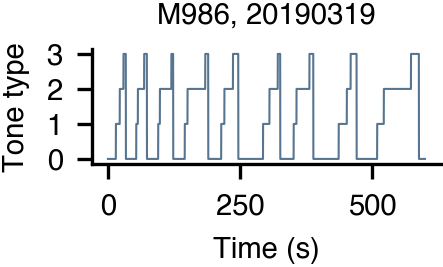

In [3]:
plt.figure(figsize=(1.5,.5))
plt.title(f"{data['subject']}, {data['day']}")
plt.plot(data['caTime'],data['seqLT_state'])
plt.xlabel('Time (s)')
plt.ylabel('Tone type')
plt.yticks([0,1,2,3])
plt.savefig(os.path.join(output_folder,'example_time_tone.pdf'))

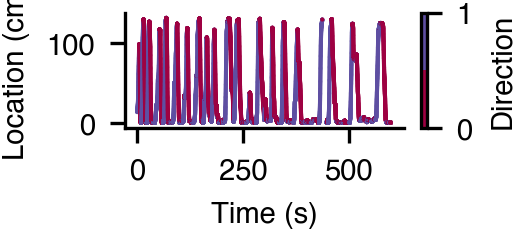

In [4]:
plt.figure(figsize=(1.5,.5))
plt.scatter(data['caTime'],data['position'][:,0],c=data['LT_direction'],marker='o', s=1, vmin=0,vmax=1,cmap=plt.cm.get_cmap('Spectral', 2), edgecolors='none')
#plt.axis('equal')
#plt.axis('off')
plt.colorbar(label='Direction')
plt.xlabel('Time (s)')
plt.ylabel('Location (cm)')
plt.savefig(os.path.join(output_folder,'example_time_location_heading.pdf'))

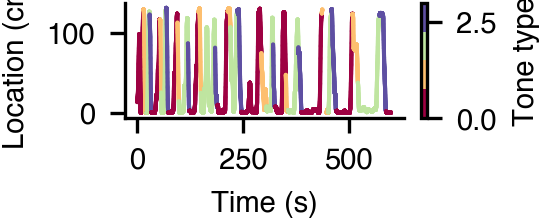

In [5]:
plt.figure(figsize=(1.5,.5))
plt.scatter(data['caTime'],data['position'][:,0],c=data['seqLT_state'],marker='o',s=1,vmin=0,vmax=3,cmap=plt.cm.get_cmap('Spectral', 4), edgecolors='none')
#plt.axis('equal')
#plt.axis('off')
plt.colorbar(label='Tone type')
plt.xlabel('Time (s)')
plt.ylabel('Location (cm)')
plt.savefig(os.path.join(output_folder,'example_time_location_tone.pdf'))

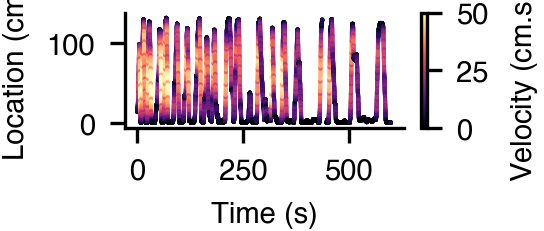

In [6]:
plt.figure(figsize=(1.5,.5))
plt.scatter(data['caTime'],data['position'][:,0],c=data['velocity'],marker='o',s=1,vmin=0,vmax=50,cmap='magma', edgecolors='none')
plt.colorbar(label='Velocity (cm.s$^{-1}$)',ticks=[0,25,50])
plt.xlabel('Time (s)')
plt.ylabel('Location (cm)')
plt.savefig(os.path.join(output_folder,'example_time_location_velocity.pdf'))

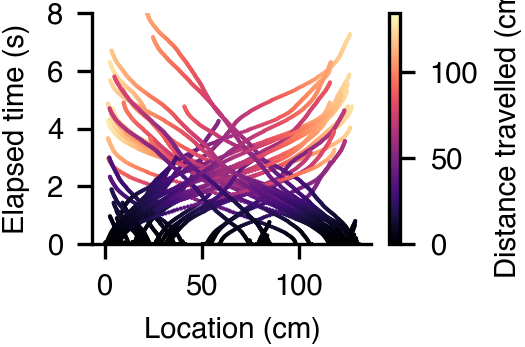

In [14]:
#plt.figure(figsize=(1.5,.5))
plt.scatter(data['position'][:,0],data['elapsed_time'], c=data['distance_travelled'],marker='o',s=1,vmin=0,vmax=134,cmap='magma', edgecolors='none')
plt.colorbar(label='Distance travelled (cm)',ticks=[0,50,100])
plt.xlabel('Location (cm)')
plt.ylabel('Elapsed time (s)')
plt.ylim([0,8])
plt.yticks([0,2,4,6,8])
plt.savefig(os.path.join(output_folder,'example_location_elapsedTime_distance.pdf'))

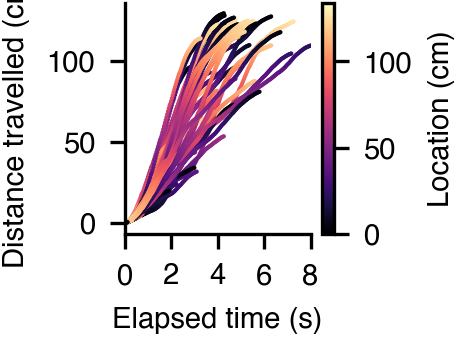

In [23]:
plt.figure(figsize=(1,1))
plt.scatter(data['elapsed_time'],data['distance_travelled'],c=data['position'][:,0],marker='o',s=1,vmin=0,vmax=134,cmap='magma', edgecolors='none')
plt.colorbar(label='Location (cm)',ticks=[0,50,100])
plt.xlabel('Elapsed time (s)')
plt.xlim([0,8])
plt.xticks([0,2,4,6,8])
plt.ylabel('Distance travelled (cm)')
plt.savefig(os.path.join(output_folder,'example_elapsedTime_distance_location.pdf'))

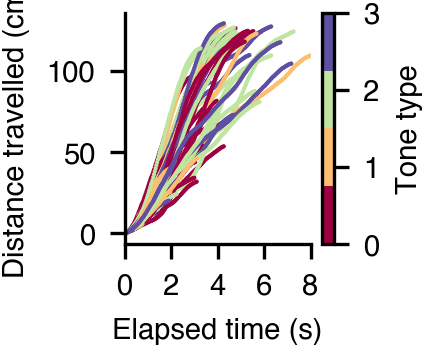

In [27]:
plt.figure(figsize=(1,1))
plt.scatter(data['elapsed_time'],data['distance_travelled'],c=data['seqLT_state'],marker='o',s=1,vmin=0,vmax=3,cmap=plt.cm.get_cmap('Spectral', 4), edgecolors='none')
plt.colorbar(label='Tone type',ticks=[0,1,2,3])
plt.xlabel('Elapsed time (s)')
plt.xlim([0,8])
plt.xticks([0,2,4,6,8])
plt.ylabel('Distance travelled (cm)')
plt.savefig(os.path.join(output_folder,'example_elapsedTime_distance_tone.pdf'))

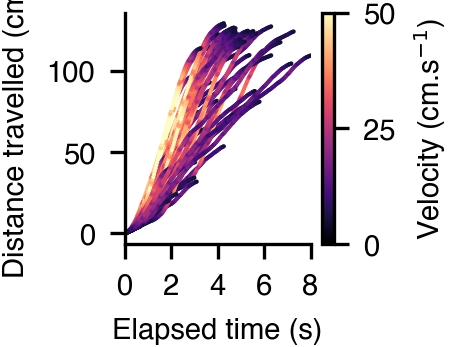

In [28]:
plt.figure(figsize=(1,1))
plt.scatter(data['elapsed_time'],data['distance_travelled'],c=data['velocity'],marker='o',s=1,vmin=0,vmax=50,cmap='magma', edgecolors='none')
plt.colorbar(label='Velocity (cm.s$^{-1}$)',ticks=[0,25,50])
plt.xlabel('Elapsed time (s)')
plt.xlim([0,8])
plt.xticks([0,2,4,6,8])
plt.ylabel('Distance travelled (cm)')
plt.savefig(os.path.join(output_folder,'example_elapsedTime_distance_velocity.pdf'))

# Open field

In [29]:
path = '../../datasets/calcium_imaging/CA1/M246/M246_OF_1'
data=load_data(path)
data = preprocess_data(data, params)

In [30]:
np.where(data['heading']<100) and np.where(data['heading']>80)

(array([    0,     1,     2, ..., 26246, 26247, 26248]),)

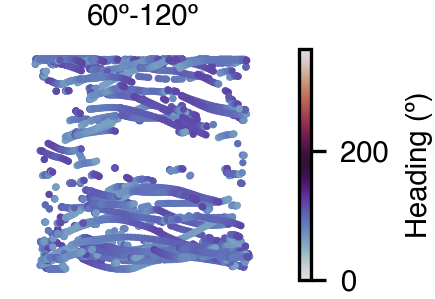

In [41]:
plt.figure()
idx = np.where(np.logical_and(data['heading']<120,data['heading']>60))
plt.scatter(data['position'][idx,0],data['position'][idx,1],c=data['heading'][idx],s=3, marker='o', vmin=0,vmax=359,cmap='twilight', edgecolors='none')
plt.axis('equal')
plt.axis('off')
plt.title('60º-120º')
plt.colorbar(label='Heading (º)')
plt.savefig(os.path.join(output_folder,'example_OF_location_heading_left.pdf'))

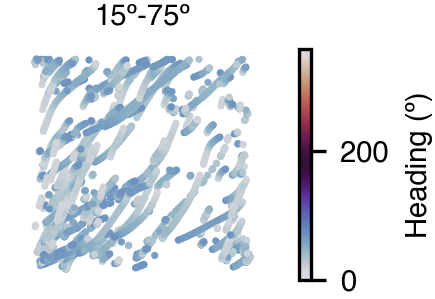

In [40]:
plt.figure()
idx = np.where(np.logical_and(data['heading']<70,data['heading']>15))
plt.scatter(data['position'][idx,0],data['position'][idx,1],c=data['heading'][idx],vmin=0,vmax=359,cmap='twilight', edgecolors='none', marker='o',s=3)
plt.axis('equal')
plt.axis('off')
plt.title('15º-75º')
plt.colorbar(label='Heading (º)')
plt.savefig(os.path.join(output_folder,'example_OF_location_heading_diagLeft.pdf'))

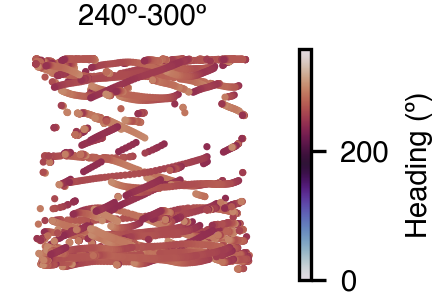

In [39]:
plt.figure()
idx = np.where(np.logical_and(data['heading']<300,data['heading']>240))
plt.scatter(data['position'][idx,0],data['position'][idx,1],c=data['heading'][idx],vmin=0,vmax=359,cmap='twilight',edgecolors='none', marker='o',s=3)
plt.axis('equal')
plt.axis('off')
plt.title('240º-300º')
plt.colorbar(label='Heading (º)')
plt.savefig(os.path.join(output_folder,'example_OF_location_heading_left.pdf'))

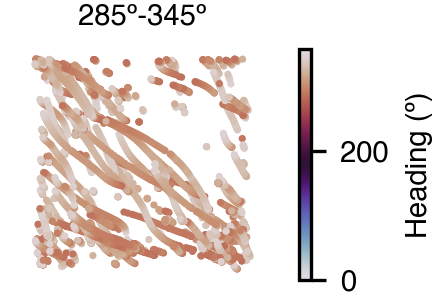

In [38]:
plt.figure()
idx = np.where(np.logical_and(data['heading']<315+30,data['heading']>315-30))
plt.scatter(data['position'][idx,0],data['position'][idx,1],c=data['heading'][idx],vmin=0,vmax=359,cmap='twilight',edgecolors='none', marker='o',s=3)
plt.axis('equal')
plt.axis('off')
plt.title('285º-345º')
plt.colorbar(label='Heading (º)')
plt.savefig(os.path.join(output_folder,'example_OF_location_heading_diagRight.pdf'))

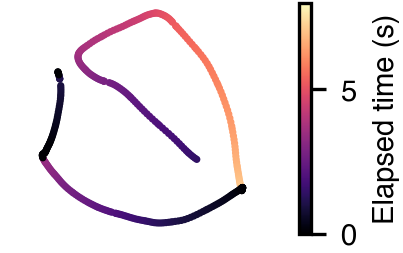

In [43]:
idx=np.arange(9030,9400)
plt.figure()
plt.scatter(data['position'][idx,0], data['position'][idx,1], c=data['elapsed_time'][idx],cmap='magma', vmin=0,vmax=8,edgecolors='none', marker='o',s=3)
plt.colorbar(label='Elapsed time (s)')
plt.axis('equal')
plt.axis('off')
plt.savefig(os.path.join(output_folder,'example_OF_trajectories_elapsedTime.pdf'))

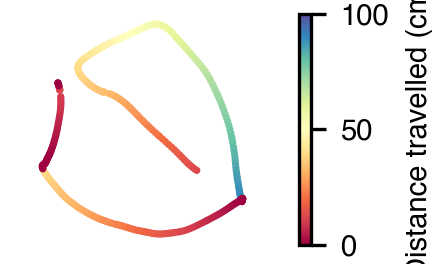

In [45]:
plt.figure()
plt.scatter(data['position'][idx,0], data['position'][idx,1], c=data['distance_travelled'][idx],cmap='Spectral', vmin=0,vmax=100, edgecolors='none', marker='o',s=3)
plt.colorbar(label='Distance travelled (cm)')
plt.axis('equal')
plt.axis('off')
plt.savefig(os.path.join(output_folder,'example_OF_trajectories_distance.pdf'))

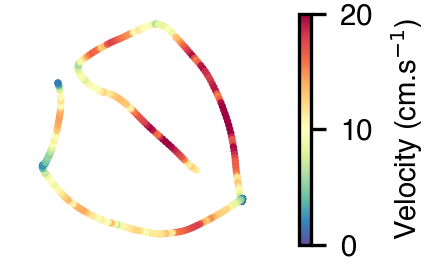

In [46]:
plt.figure()
plt.scatter(data['position'][idx,0], data['position'][idx,1], c=data['velocity'][idx],cmap='Spectral_r', vmin=0,vmax=20, edgecolors='none', marker='o',s=3)
plt.colorbar(label='Velocity (cm.s$^{-1}$)',ticks=[0,10,20])
plt.axis('equal')
plt.axis('off')
plt.savefig(os.path.join(output_folder,'example_OF_trajectories_velocity.pdf'))